In [51]:
import sys
sys.path.append("../")
import pandas as pd
from data_utils import DataLoader
from utils import visualization

In [52]:
data_loader = DataLoader(file_path='../data/raw/car.data' , target_column='class', test_size=0.2, random_state=42)

In [53]:
X, y = data_loader.get_data()

In [54]:
df = data_loader.get_df()

In [55]:
df.shape

(1728, 7)

In [56]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [65]:
for col in df.columns:
    print(col, df[col].unique())
    print('-'*30)
    print(df[col].value_counts())
    print("="*30 + '\n')

buying ['vhigh' 'high' 'med' 'low']
------------------------------
vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

maint ['vhigh' 'high' 'med' 'low']
------------------------------
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64

doors ['2' '3' '4' '5more']
------------------------------
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

persons ['2' '4' 'more']
------------------------------
2       576
4       576
more    576
Name: persons, dtype: int64

lug_boot ['small' 'med' 'big']
------------------------------
small    576
med      576
big      576
Name: lug_boot, dtype: int64

safety ['low' 'med' 'high']
------------------------------
low     576
med     576
high    576
Name: safety, dtype: int64

class ['unacc' 'acc' 'vgood' 'good']
------------------------------
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



In [71]:
c = df['class'].value_counts()
p = df['class'].value_counts(normalize=True).mul(100).round(2)

pd.concat([c, p], axis = 1, keys=['count', '%'])

,count,%
unacc,1210,70.02
acc,384,22.22
good,69,3.99
vgood,65,3.76


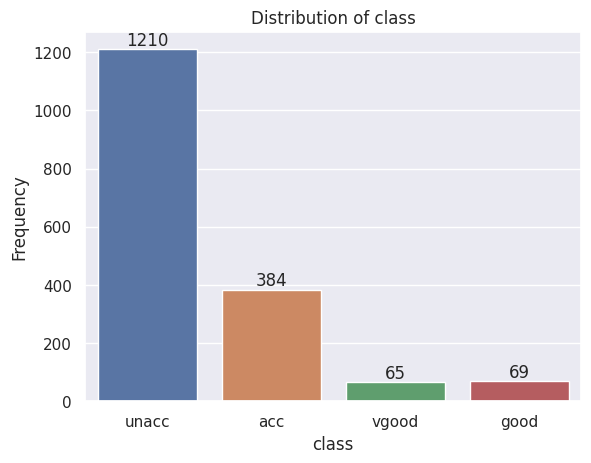

In [61]:
visualization.plot_count(df, col='class')